In [2]:
%matplotlib inline

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts


In [4]:
# Files locations placed into variables

ride_data_load = 'Resources/ride_data.csv'
city_data_load = 'Resources/city_data.csv'

In [5]:
city_data_df = pd.read_csv(city_data_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
ride_data_df = pd.read_csv(ride_data_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
city_data_df.count() 

city            120
driver_count    120
type            120
dtype: int64

In [8]:
city_data_df.isnull().sum() 

city            0
driver_count    0
type            0
dtype: int64

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Unique values for cities column

city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
sum(city_data_df['type']=='Urban')


66

In [14]:
sum(city_data_df['type']=='Suburban')

36

In [15]:
sum(city_data_df['type']=='Rural')

18

In [16]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [17]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [18]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [22]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [23]:
# Create new dataframe from PyBer data frame to filter down to all Urban cities

urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [26]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [27]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [28]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [29]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [30]:
urban_avg_drivers = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_avg_drivers = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_avg_drivers = rural_cities_df.groupby(['city']).mean()['driver_count']

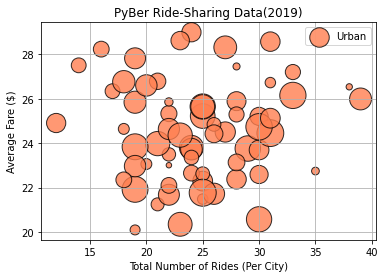

In [38]:
fig, ax = plt.subplots()

ax.scatter(urban_ride_count, 
        urban_avg_fare, 
        s=urban_avg_drivers * 10, 
        c='coral', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Urban')
ax.set_title('PyBer Ride-Sharing Data(2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

plt.show()

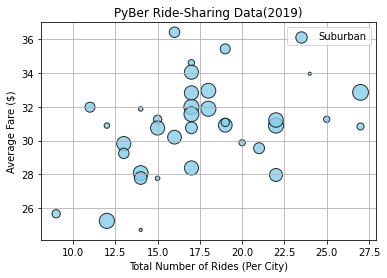

In [39]:
fig, ax = plt.subplots()

ax.scatter(suburban_ride_count, suburban_avg_fare, 
        s=suburban_avg_drivers * 10, 
        c='skyblue', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Suburban')
ax.set_title('PyBer Ride-Sharing Data(2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

plt.show()

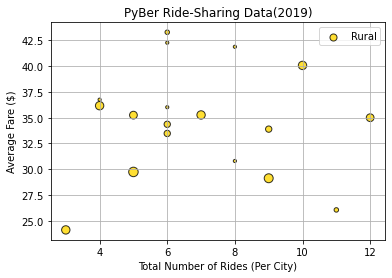

In [40]:
fig, ax = plt.subplots()

ax.scatter(rural_ride_count, rural_avg_fare, 
        s=rural_avg_drivers * 10, 
        c='gold', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Rural')
ax.set_title('PyBer Ride-Sharing Data(2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

plt.show()

No handles with labels found to put in legend.


IndexError: list index out of range

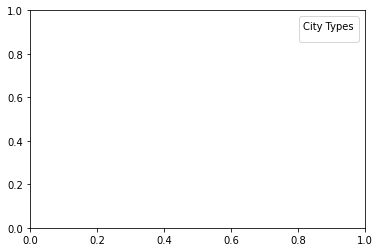

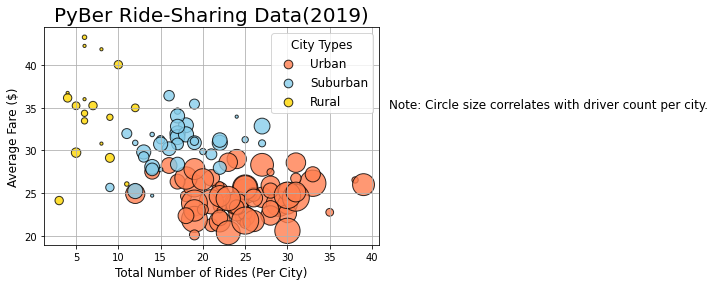

In [55]:
# Add all scatter plot code blocks into one cell to combine

fig, ax = plt.subplots()

ax.scatter(urban_ride_count, 
        urban_avg_fare, 
        s=urban_avg_drivers * 10, 
        c='coral', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Urban')

ax.scatter(suburban_ride_count, suburban_avg_fare, 
        s=suburban_avg_drivers * 10, 
        c='skyblue', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Suburban')

ax.scatter(rural_ride_count, rural_avg_fare, 
        s=rural_avg_drivers * 10, 
        c='gold', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Rural')

# Provide context with a chart title and axes labels
ax.set_title('PyBer Ride-Sharing Data(2019)', fontsize=20)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=12)
ax.set_ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

# Add in the legend for bubble color identification
lgnd = plt.legend(fontsize='12', mode='Expanded',
            scatterpoints=1, loc='best', title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize='12')


plt.show()

In [56]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [57]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [58]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [59]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [60]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [61]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [62]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [63]:
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [64]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [70]:
# Calculate measure of central tendency using numpy and scipy

mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts of urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts of urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts of urban trips is {mode_urban_ride_count}.')



The mean for the ride counts of urban trips is 24.62.
The median for the ride counts of urban trips is 24.0.
The mode for the ride counts of urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [71]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts of suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for the ride counts of suburban trips is {median_suburban_ride_count}.')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts of suburban trips is {mode_suburban_ride_count}.')

The mean for the ride counts of suburban trips is 17.36.
The median for the ride counts of suburban trips is 17.0.
The mode for the ride counts of suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [73]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts of rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts of rural trips is {median_rural_ride_count}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts of rural trips is {mode_rural_ride_count}.')

The mean for the ride counts of rural trips is 6.94.
The median for the ride counts of rural trips is 6.0.
The mode for the ride counts of rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [74]:
urban_fare = urban_cities_df['fare']

urban_fare.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [77]:
suburban_fare = suburban_cities_df['fare']
rural_fare = rural_cities_df['fare']

In [76]:
mean_urban_fare = np.mean(urban_fare)
print(f'The mean for the fare price of urban trips is {mean_urban_fare:.2f}.')

median_urban_fare = np.median(urban_fare)
print(f'The median for the fare price of urban trips is {median_urban_fare:.2f}.')

mode_urban_fare = sts.mode(urban_fare)
print(f'The mode for the fare price of urban trips is {mode_urban_fare}.')

The mean for the fare price of urban trips is 24.53.
The median for the fare price of urban trips is 24.64.
The mode for the fare price of urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [78]:
mean_suburban_fare = np.mean(suburban_fare)
print(f'The mean for the fare price of suburban trips is {mean_suburban_fare:.2f}.')

median_suburban_fare = np.median(suburban_fare)
print(f'The median for the fare price of suburban trips is {median_suburban_fare:.2f}.')

mode_suburban_fare = sts.mode(suburban_fare)
print(f'The mode for the fare price of suburban trips is {mode_suburban_fare}.')

The mean for the fare price of suburban trips is 30.97.
The median for the fare price of suburban trips is 30.75.
The mode for the fare price of suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [79]:
mean_rural_fare = np.mean(rural_fare)
print(f'The mean for the fare price of rural trips is {mean_rural_fare:.2f}.')

median_rural_fare = np.median(rural_fare)
print(f'The median for the fare price of rural trips is {median_rural_fare:.2f}.')

mode_rural_fare = sts.mode(rural_fare)
print(f'The mode for the fare price of rural trips is {mode_rural_fare}.')

The mean for the fare price of rural trips is 34.62.
The median for the fare price of rural trips is 37.05.
The mode for the fare price of rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [82]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']


In [83]:
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean for the fare price of rural trips is {mean_urban_drivers:.2f}.')

median_urban_drivers = np.median(urban_drivers)
print(f'The median for the fare price of rural trips is {median_urban_drivers:.2f}.')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode for the fare price of rural trips is {mode_urban_drivers}.')

The mean for the fare price of rural trips is 36.68.
The median for the fare price of rural trips is 37.00.
The mode for the fare price of rural trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [84]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean for the fare price of rural trips is {mean_suburban_drivers:.2f}.')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median for the fare price of rural trips is {median_suburban_drivers:.2f}.')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode for the fare price of rural trips is {mode_suburban_drivers}.')

The mean for the fare price of rural trips is 13.71.
The median for the fare price of rural trips is 16.00.
The mode for the fare price of rural trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [85]:
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean for the drivers price of rural trips is {mean_rural_drivers:.2f}.')

median_rural_drivers = np.median(rural_drivers)
print(f'The median for the drivers price of rural trips is {median_rural_drivers:.2f}.')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode for the drivers price of rural trips is {mode_rural_drivers}.')

The mean for the drivers price of rural trips is 4.30.
The median for the drivers price of rural trips is 4.00.
The mode for the drivers price of rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


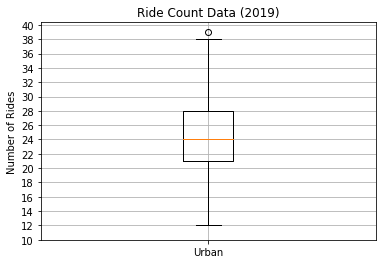

In [86]:
# Box and whisker plot for urban cities ride count

x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

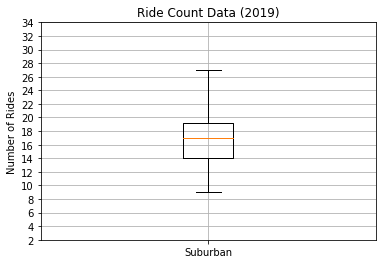

In [91]:
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 35, step=2.0))
ax.grid()
plt.show()

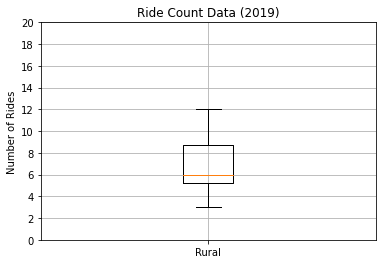

In [89]:
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 21, step=2.0))
ax.grid()
plt.show()

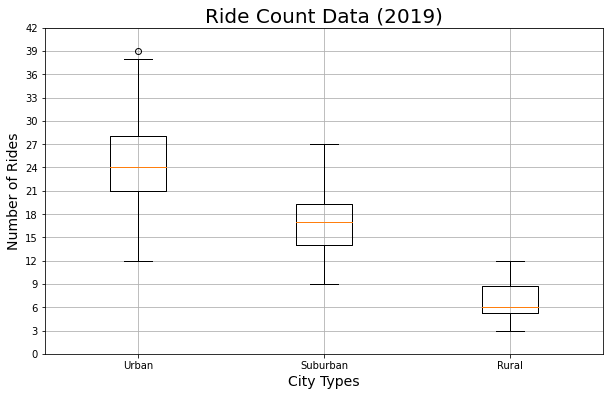

In [92]:
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.show()

In [93]:
# Get city name that matches our Urban 39 outlier

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


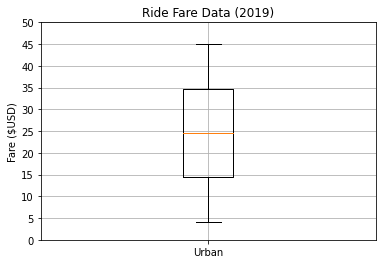

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [95]:
x_labels=['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fare, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fare.describe()

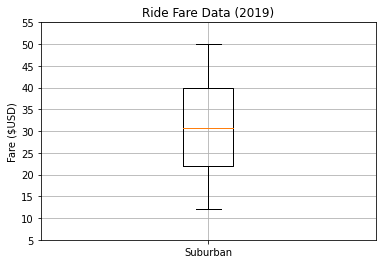

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [97]:
x_labels=['Urban, Suburban, Rural']
fare_data = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots()
ax.boxplot(suburban_fare, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburban_fare.describe()

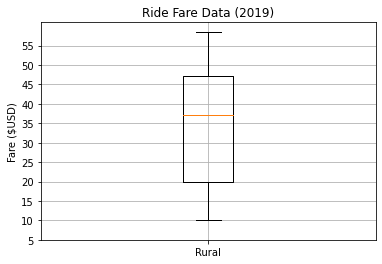

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [98]:
x_labels=['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fare, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
rural_fare.describe()

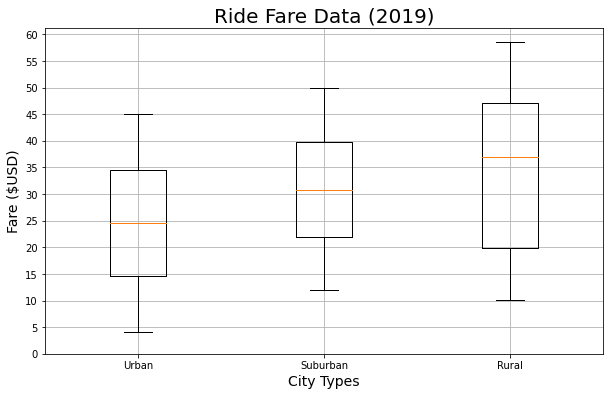

In [99]:
x_labels=['Urban', 'Suburban', 'Rural']
fare_data = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()
